# EDA Case Study on Credit Risk Analytics

### Introduction:
   __This case study aims to give an idea of applying EDA in a real business scenario. Here, we understand the use of analysis of data to minimise the risk of losing money while lending to customers. Additionally, we also develop a basic understanding of risk analytics in banking and financial services.__

### Business Understanding:
__The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Here, we assume that the data from a consumer finance company that specialises in lending various types of loans to urban customers has been provided. We have to use EDA to analyse the patterns present in the data in order to ensure that the applicants capable of repaying the loan are not rejected.__

-  __When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision :__
     1.  __If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.__
     
     2.  __If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.__
   
   
-  __The data provided in the file 'application_data.csv' contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios :__
     1.  __The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample__
     
     2.  __All other cases when the payment is paid on time__
    
    
-  __When a client applies for a loan, there are four types of decisions that could be taken by the client/company, as per the data in the file 'previous_application.csv' :__

    1. __Approved: The Company has approved loan Application__
    
    2. __Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want__
    
    3. __Refused: The company had rejected the loan (because the client does not meet their requirements etc.)__
    
    4. __Unused offer:Loan has been cancelled by the client but on different stages of the process.__
    
__Thus, in this case study we use EDA to understand the influence of consumer and loan attributes on the tendency of default.__

### Business Objective

__This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as - denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected.__ 

__Aim of the case study: Identification of such applicants using EDA.__

__In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.__


### Importing Libraries


In [1]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools 

In [2]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
#for viewing required rows & columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

## 1. Data Sourcing

###  1.1. Reading the data

In [4]:
#Reading the application_data.csv file
# application_df = pd.read_csv(r'C:\Users\lappy\Downloads\EDA Case Study\'application_data.csv') 
application_df = pd.read_csv('application_data.csv') 
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#Reading the previous_data.csv file
# previous_df = pd.read_csv(r'C:\Users\lappy\Downloads\EDA Case Study\'previous_application.csv')  
previous_df = pd.read_csv('previous_application.csv')  
previous_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


###  1.2. Structure Of DataFrames

### Application Data:

In [6]:
#Checking the column wise information 
application_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [7]:
#Checking the dimensions
application_df.shape

(307511, 122)

In [8]:
#Checking summary for the numeric columns 
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Previous Application Data:

In [9]:
#Checking the column wise information 
previous_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
#Checking the dimensions
previous_df.shape

(1670214, 37)

In [11]:
#Checking summary for the numeric columns 
previous_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## 2. Data Cleaning

### 2.1. Handling Null Values 

### Null Values in Application Data:

In [12]:
#Creating null_applicationDF to hold null values % in each column of application_df
null_applicationDF = pd.DataFrame(round((application_df.isnull().sum())/application_df.shape[0]*100,2)).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
null_applicationDF.sort_values(by='Null Values Percentage',ascending=False)

,Column Name,Null Values Percentage
76,COMMONAREA_MEDI,69.87
48,COMMONAREA_AVG,69.87
62,COMMONAREA_MODE,69.87
70,NONLIVINGAPARTMENTS_MODE,69.43
56,NONLIVINGAPARTMENTS_AVG,69.43
84,NONLIVINGAPARTMENTS_MEDI,69.43
86,FONDKAPREMONT_MODE,68.39
68,LIVINGAPARTMENTS_MODE,68.35
54,LIVINGAPARTMENTS_AVG,68.35
82,LIVINGAPARTMENTS_MEDI,68.35


__There are many columns in 'applicationDF' dataframe with missing values more than 40%. We have to handle such columns by either ignoring or imputing values as per requirement.__ 

In [13]:
# Dataframe to hold columns with >=40% missing values
nullcol_40_application = null_applicationDF[null_applicationDF["Null Values Percentage"]>=40]
nullcol_40_application.sort_values(["Null Values Percentage"])

,Column Name,Null Values Percentage
90,EMERGENCYSTATE_MODE,47.40
88,TOTALAREA_MODE,48.27
74,YEARS_BEGINEXPLUATATION_MEDI,48.78
46,YEARS_BEGINEXPLUATATION_AVG,48.78
60,YEARS_BEGINEXPLUATATION_MODE,48.78
79,FLOORSMAX_MEDI,49.76
65,FLOORSMAX_MODE,49.76
51,FLOORSMAX_AVG,49.76
87,HOUSETYPE_MODE,50.18
69,LIVINGAREA_MODE,50.19


In [14]:
# No. of columns with >=40% null values
len(nullcol_40_application)

49

##### INSIGHTS:
__There are 49 columns with more than 40% missing values in them. Most of the columns with high missing values are related to different area sizes or apartment owned/rented by the loan applicant.__

In [15]:
# Creating a list of columns that needs to be dropped including the columns with >=40% null values
Unwanted_application = nullcol_40_application["Column Name"].tolist()
len(Unwanted_application)

49

__Before handling the above Null value Columns, we need to verify if there are more columns that are not relevant for this analysis and hence can be dropped.__

####  Flag Document

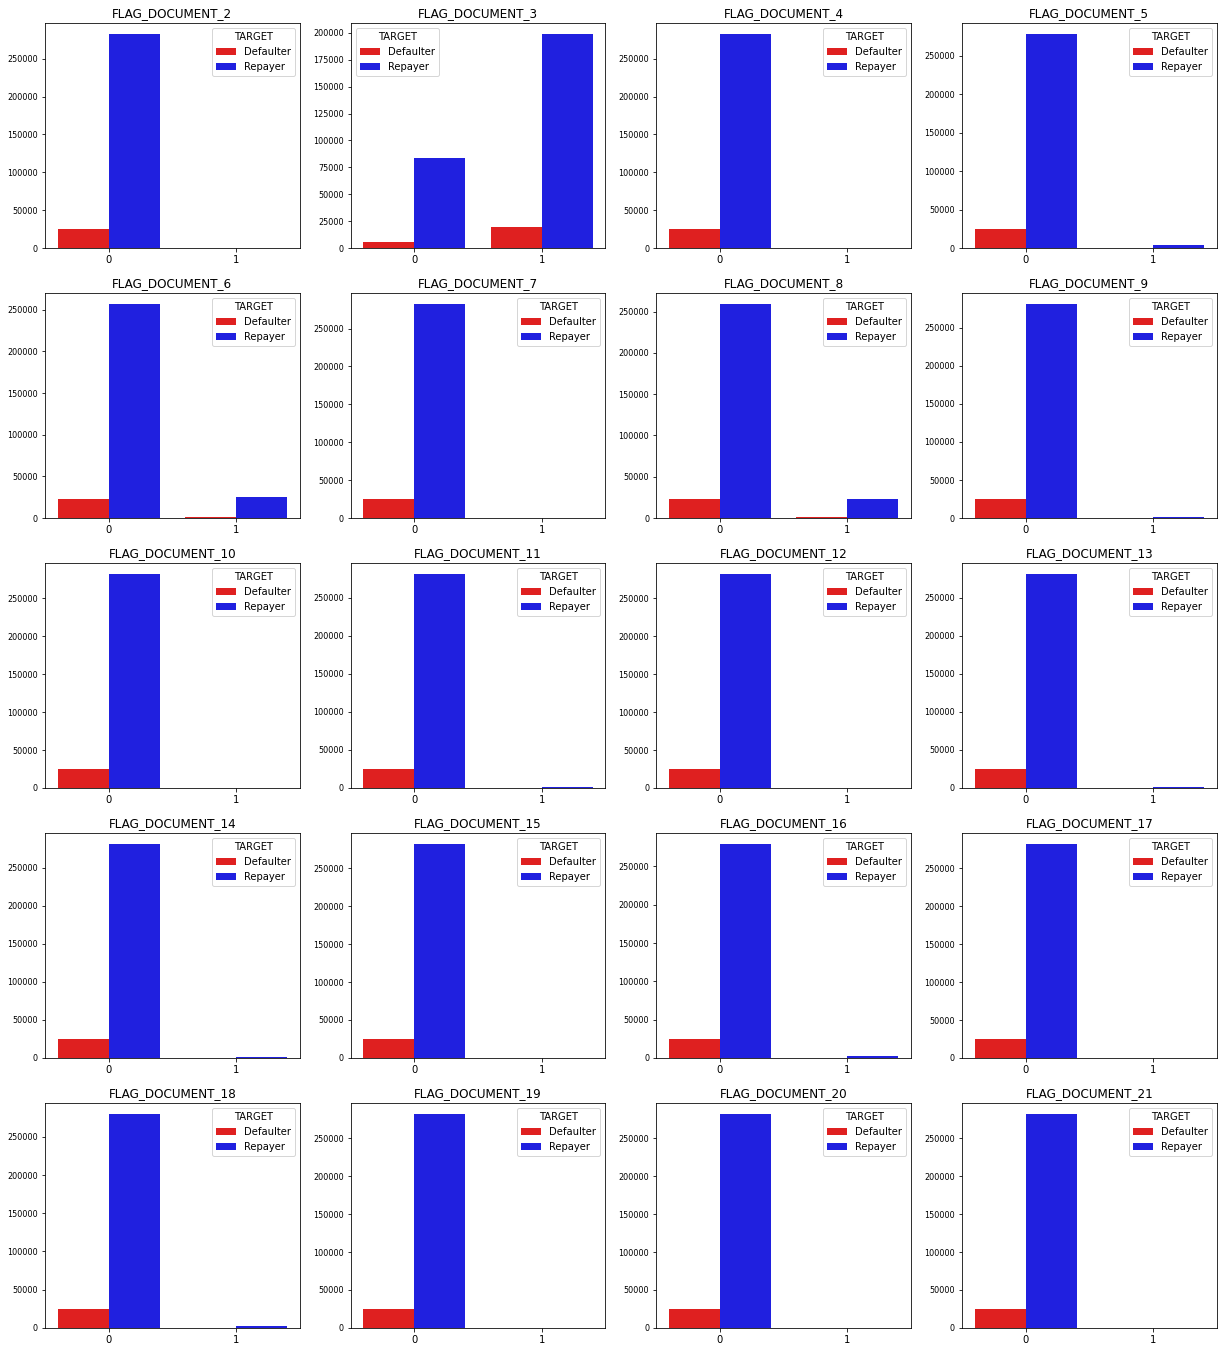

In [16]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag = application_df[col_Doc+["TARGET"]]

length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(col_Doc,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","b"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

__As per the above graph, it is observed that in most of the loan application cases, clients who applied for loans have not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, except for FLAG_DOCUMENT_3, we can delete rest of the FLAG_DOCUMENT_X columns. Also, it is observed that if applicant has submitted FLAG_DOCUMENT_3 then there is a lesser chance of defaulting the loan.__

In [17]:
# Including the flag documents for dropping the Document columns
col_Doc.remove('FLAG_DOCUMENT_3') 
Unwanted_application = Unwanted_application + col_Doc
len(Unwanted_application)

68

#### EXT_Source

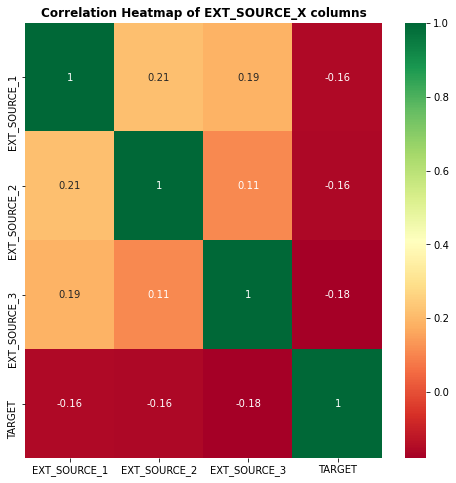

In [18]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = application_df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")
plt.title('Correlation Heatmap of EXT_SOURCE_X columns',
          fontdict={'fontsize':12,'weight':'bold','horizontalalignment':'center'})
plt.show()

__Based on the above Heatmap, we observe that there is almost no correlation between EXT_SOURCE_X columns and target column. Thus we can drop these columns as well.__

In [19]:
# Including the Ext_source for dropping the Document columns
Unwanted_application = Unwanted_application + ['EXT_SOURCE_2','EXT_SOURCE_3'] 
# as EXT_SOURCE_1 column is already included in nullcol_40_application 
len(Unwanted_application)

70

#### Contact Flags

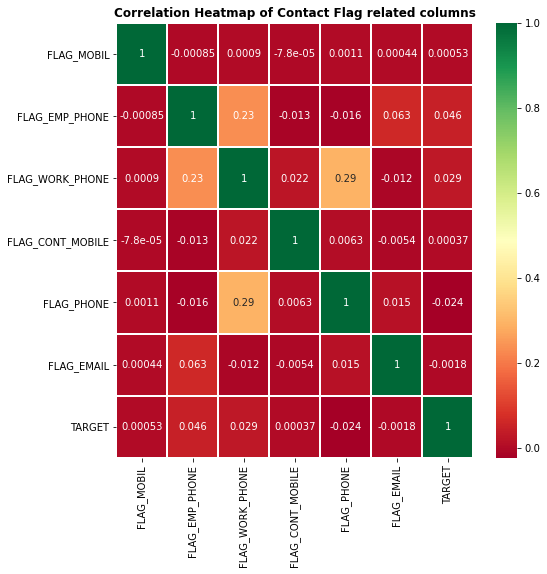

In [20]:
# Checking the correlation between mobile phone, work phone etc., email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 
               'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = application_df[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)
plt.title('Correlation Heatmap of Contact Flag related columns',
          fontdict={'fontsize':12,'weight':'bold','horizontalalignment':'center'})
plt.show()

__Based on the above Heatmap, we observe that there is no correlation between Contact flags and Target variable. Hence, we can drop these columns as well.__

In [21]:
# Including the 6 FLAG columns to be dropped
contact_col.remove('TARGET') 
Unwanted_application = Unwanted_application + contact_col
len(Unwanted_application)

76

##### INSIGHTS:
__There are 76 columns which can be dropped from the Application Dataframe for this analysis.__ 

In [22]:
# Dropping the unnecessary columns from applicationDF
application_df.drop(labels=Unwanted_application,axis=1,inplace=True)

# Inspecting the dataframe after removal of unnecessary columns
application_df.shape

(307511, 46)

In [23]:
# Inspecting the column types after removal of unnecessary columns
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

__After dropping non relevant columns we have 46 Columns in the Application Dataframe.__

### Null Values in Previous Application Data: 

In [24]:
#Creating null_previousDF to hold null values % in each column of previous_df
null_previousDF = pd.DataFrame(round((previous_df.isnull().sum())/previous_df.shape[0]*100,2)).reset_index()
null_previousDF.columns = ['Column Name', 'Null Values Percentage']
null_previousDF.sort_values(by='Null Values Percentage',ascending=False)

,Column Name,Null Values Percentage
14,RATE_INTEREST_PRIVILEGED,99.64
13,RATE_INTEREST_PRIMARY,99.64
12,RATE_DOWN_PAYMENT,53.64
6,AMT_DOWN_PAYMENT,53.64
20,NAME_TYPE_SUITE,49.12
36,NFLAG_INSURED_ON_APPROVAL,40.30
31,DAYS_FIRST_DRAWING,40.30
32,DAYS_FIRST_DUE,40.30
33,DAYS_LAST_DUE_1ST_VERSION,40.30
34,DAYS_LAST_DUE,40.30


__There are many columns in 'previousDF' dataframe with missing values more than 40%. We have to handle such columns by either ignoring or imputing values as per requirement.__

In [25]:
# Dataframe to hold columns with >=40% missing values
nullcol_40_previous = null_previousDF[null_previousDF["Null Values Percentage"]>=40]
nullcol_40_previous.sort_values(["Null Values Percentage"])

,Column Name,Null Values Percentage
31,DAYS_FIRST_DRAWING,40.30
32,DAYS_FIRST_DUE,40.30
33,DAYS_LAST_DUE_1ST_VERSION,40.30
34,DAYS_LAST_DUE,40.30
35,DAYS_TERMINATION,40.30
36,NFLAG_INSURED_ON_APPROVAL,40.30
20,NAME_TYPE_SUITE,49.12
6,AMT_DOWN_PAYMENT,53.64
12,RATE_DOWN_PAYMENT,53.64
13,RATE_INTEREST_PRIMARY,99.64


In [26]:
# No. of columns with >=40% null values
len(nullcol_40_previous)

11

##### INSIGHTS:
__There are 11 columns with more than 40% missing values in them. Most of the columns with high missing values are related to interest rates and days of due payment for the loan.__

In [27]:
# Creating a list of columns that needs to be dropped including the columns with >=40% null values
Unwanted_previous = nullcol_40_previous["Column Name"].tolist()
Unwanted_previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [28]:
# Listing down other columns not necessary for this analysis
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [29]:
Unwanted_previous = Unwanted_previous + Unnecessary_previous
len(Unwanted_previous)

15

##### INSIGHTS:
__There are 15 columns which can be dropped from the from the Previous Application DataFrame for this analysis.__

In [30]:
# Dropping the unnecessary columns from previous_df
previous_df.drop(labels=Unwanted_previous,axis=1,inplace=True)

# Inspecting the dataframe after removal of unnecessary columns
previous_df.shape

(1670214, 22)

In [31]:
# Inspecting the column types after after removal of unnecessary columns
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

__After dropping non relevant columns we have 22 Columns in the Previous Application Dataframe.__

### 2.2. Standardize Values

### For Application DataFrame:

-  __Converting DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH from negative to positive as days cannot be negative.__

-  __Converting DAYS_BIRTH from negative to positive values to calculate AGE and create categorical bins for the same.__

-  __Grouping the amount variables into bins.__

-  __Converting region rating column and other such required columns to categorical.__

In [32]:
# Converting negative days to positive days
date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in date_col:
    application_df[col] = abs(application_df[col])

#### Binning Numerical Columns to create corresponding Categorical Columns

In [33]:
# Creating bins for income amount
application_df['AMT_INCOME_TOTAL']=application_df['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

application_df['AMT_INCOME_RANGE']=pd.cut(application_df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [34]:
#Checking the binning of data and % of data in each category
application_df['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

##### INSIGHTS:
__For 50% of applicants the Income range is between 100K-200K and 90% of applicants have an Income less than 300K.__ 

In [35]:
# Creating bins for Credit amount
application_df['AMT_CREDIT']=application_df['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

application_df['AMT_CREDIT_RANGE']=pd.cut(application_df['AMT_CREDIT'],bins=bins,labels=slots)

In [36]:
#Checking the binning of data and % of data in each category
application_df['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

##### INSIGHTS:
__More than 16% Loan Applicants have applied for an amount of above 1M.__

In [37]:
# Creating bins for Age
application_df['AGE'] = application_df['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

application_df['AGE_GROUP']=pd.cut(application_df['AGE'],bins=bins,labels=slots)

In [38]:
#Checking the binning of data and % of data in each category
application_df['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

##### INSIGHTS:
__More than 31% of Applicants are above 50 years of age and 51% applicants are in the age group of 30-50 years.__

In [39]:
# Creating bins for Employement Time
application_df['YEARS_EMPLOYED'] = application_df['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

application_df['EMPLOYMENT_YEAR']=pd.cut(application_df['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [40]:
#Checking the binning of data and % of data in each category
application_df['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
60 above     0.000000
50-60        0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

##### INSIGHTS:
__More than 55% applicants are employed for 0-5 years and almost 80% applicants are employed for less than 10 years.__ 

In [41]:
#Checking the number of unique values each column possess to identify categorical columns
application_df.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

##### DataType Conversion

In [42]:
# Inspecting the column types if they are in correct data type using the above result.
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

__Numerical Columns are in Correct Format. We need to modify some categorical variables that are being considered as object in this analysis.__

In [43]:
#Conversion of Object and Numerical columns to Categorical Columns
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categorical_columns:
    application_df[col] =pd.Categorical(application_df[col])

In [44]:
# Inspecting the column types if the above conversion is reflected
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

### For Previous Application DataFrame:

-  __Converting DAYS_DECISION from negative to positive values and creating their corresponding categorical bins.__

-  __Converting loan purpose and few other such required columns to categorical.__

In [45]:
#Converting negative days to positive days 
previous_df['DAYS_DECISION'] = abs(previous_df['DAYS_DECISION'])

In [46]:
# Creating bins for days_decision
previous_df['DAYS_DECISION_GROUP'] = (previous_df['DAYS_DECISION']-(previous_df['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((previous_df['DAYS_DECISION'] - (previous_df['DAYS_DECISION'] % 400)) + (previous_df['DAYS_DECISION'] % 400) + (400 - (previous_df['DAYS_DECISION'] % 400))).astype(str)

In [47]:
#Checking the binning of data and % of data in each category
previous_df['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: DAYS_DECISION_GROUP, dtype: float64

##### INSIGHTS: 
__About 37% loan applicants have applied for a new loan within 0-400 days of previous loan application.__

In [48]:
#Checking the number of unique values each column possess to identify categorical columns
previous_df.nunique().sort_values() 

NAME_PRODUCT_TYPE               3
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_STATUS            4
NAME_YIELD_GROUP                5
NAME_PORTFOLIO                  5
DAYS_DECISION_GROUP             8
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [49]:
#Converting Categorical columns from Object to categorical 
Catgorical_col_p = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in Catgorical_col_p:
    previous_df[col] =pd.Categorical(previous_df[col])

In [50]:
# Inspecting the column types after conversion
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

### 2.3. Null Value Data Imputation

### Imputation For Application Data:

In [51]:
# Checking the null value % of each column in applicationDF dataframe
round(application_df.isnull().sum() / application_df.shape[0] * 100.00,2).sort_values(ascending=False)

OCCUPATION_TYPE                31.35
EMPLOYMENT_YEAR                27.08
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
DEF_60_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
AMT_GOODS_PRICE                 0.09
AMT_INCOME_RANGE                0.08
NAME_CONTRACT_TYPE              0.00
TARGET                          0.00
DAYS_BIRTH                      0.00
REGION_POPULATION_RELATIVE      0.00
NAME_HOUSING_TYPE               0.00
NAME_FAMILY_STATUS              0.00
NAME_EDUCATION_TYPE             0.00
NAME_INCOME_TYPE                0.00
FLAG_OWN_REALTY                 0.00
FLAG_OWN_CAR                    0.00
AMT_ANNUITY                     0.00
AMT_CREDIT                      0.00
A

__Imputing categorical variable 'NAME_TYPE_SUITE' which has lower null percentage(0.42%) with the most frequent category(Mode).__

In [52]:
application_df['NAME_TYPE_SUITE'].describe() 

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [53]:
#Imputing missing values of NAME_TYPE_SUITE with its mode
application_df['NAME_TYPE_SUITE'].fillna((application_df['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

__Imputing categorical variable 'OCCUPATION_TYPE' which has higher null percentage(31.35%) with a new category as assigning any existing category might influence the analysis.__

In [54]:
#Imputing missing values of OCCUPATION_TYPE with Unknown
application_df['OCCUPATION_TYPE'] = application_df['OCCUPATION_TYPE'].cat.add_categories('Unknown')
application_df['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 

In [55]:
#No. of enquiry related columns
application_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


__Imputing the columns representing the number of enquiries made with their respective median values as there are no outliers that can be observed from the summary statistics and also their mean() return decimal values and cannot be used for count of enquiries.__

In [56]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    application_df[col].fillna(application_df[col].median(),inplace = True)

In [57]:
# Checking the null value % of each column in dataframe after imputation
round(application_df.isnull().sum() / application_df.shape[0] * 100.00,2).sort_values(ascending=False)

EMPLOYMENT_YEAR                27.08
OBS_60_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
AMT_GOODS_PRICE                 0.09
AMT_INCOME_RANGE                0.08
TARGET                          0.00
DAYS_ID_PUBLISH                 0.00
DAYS_REGISTRATION               0.00
DAYS_EMPLOYED                   0.00
DAYS_BIRTH                      0.00
REGION_POPULATION_RELATIVE      0.00
NAME_HOUSING_TYPE               0.00
NAME_FAMILY_STATUS              0.00
NAME_EDUCATION_TYPE             0.00
NAME_INCOME_TYPE                0.00
NAME_CONTRACT_TYPE              0.00
FLAG_OWN_CAR                    0.00
CODE_GENDER                     0.00
CNT_FAM_MEMBERS                 0.00
NAME_TYPE_SUITE                 0.00
AMT_ANNUITY                     0.00
AMT_CREDIT                      0.00
AMT_INCOME_TOTAL                0.00
CNT_CHILDREN                    0.00
FLAG_OWN_REALTY                 0.00
O

__We still have few null values in the columns: AMT_GOODS_PRICE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE. We can ignore these records for this analysis as their occurence is of very low percentage.__

### Imputation For Previous Application Data:

-  __For numerical columns, we analyse their relation with the loan status and impute null values accordingly.__

-  __For continuous variables, we plot the distribution of the columns and impute null values using:__

   -  __'median' if the distribution is skewed__
   
   -  __'mode' if the distribution pattern is preserved__

In [58]:
# checking the null value % of each column in previousDF dataframe
round(previous_df.isnull().sum() / previous_df.shape[0] * 100.00,2).sort_values(ascending=False)

AMT_GOODS_PRICE           23.08
CNT_PAYMENT               22.29
AMT_ANNUITY               22.29
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
DAYS_DECISION              0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
CODE_REJECT_REASON         0.00
NAME_PAYMENT_TYPE          0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
NAME_YIELD_GROUP           0.00
SK_ID_PREV                 0.00
dtype: float64

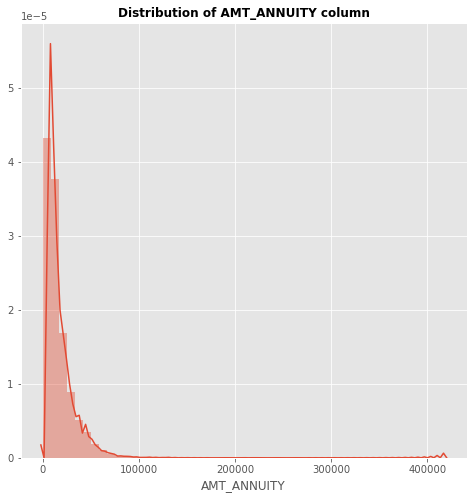

In [59]:
# Distribution of AMT_ANNUITY
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
sns.distplot(previous_df['AMT_ANNUITY'])
plt.title('Distribution of AMT_ANNUITY column',
          fontdict={'fontsize':12,'weight':'bold','horizontalalignment':'center'})
plt.show()

__We observe a single peak at the left side of the AMT_ANNUITY distribution which indicates the presence of outliers. Hence, imputing with median will be more appropriate as imputing null values with mean may lead to exaggeration of data.__

In [60]:
#Imputing missing values of AMT_ANNUITY with its median
previous_df['AMT_ANNUITY'].fillna(previous_df['AMT_ANNUITY'].median(),inplace = True)

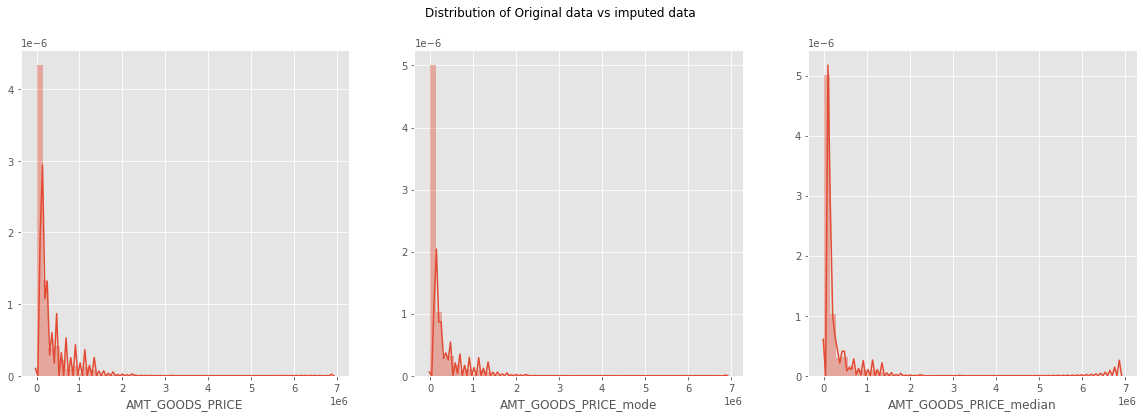

In [61]:
# Distribution of AMT_GOODS_PRICE_mode

tempDF = pd.DataFrame()
tempDF['AMT_GOODS_PRICE_mode'] = previous_df['AMT_GOODS_PRICE'].fillna(previous_df['AMT_GOODS_PRICE'].mode()[0])
tempDF['AMT_GOODS_PRICE_median'] = previous_df['AMT_GOODS_PRICE'].fillna(previous_df['AMT_GOODS_PRICE'].median())
tempDF['AMT_GOODS_PRICE_mean'] = previous_df['AMT_GOODS_PRICE'].fillna(previous_df['AMT_GOODS_PRICE'].mean())

plt.figure(figsize=(20,6))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(131)
sns.distplot(previous_df['AMT_GOODS_PRICE'])
plt.subplot(132)
sns.distplot(tempDF['AMT_GOODS_PRICE_mode'])
plt.subplot(133)
sns.distplot(tempDF['AMT_GOODS_PRICE_median'])
plt.show()

__As the original distribution is observed to be closer to the distribution of AMT_GOODS_PRICE data when imputed with mode. Hence, it is more appropriate to impute the missing values with mode.__ 

In [62]:
#Imputing missing values of AMT_GOODS_PRICE with its mode
previous_df['AMT_GOODS_PRICE'].fillna(previous_df['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [63]:
#Imputing missing values of CNT_PAYMENT with '0'
previous_df.loc[previous_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

__Imputing missing values for CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started.__

In [64]:
#Imputing missing values of CNT_PAYMENT with '0'
previous_df['CNT_PAYMENT'].fillna(0,inplace = True)

In [65]:
# Checking the null value % of each column after Imputation
round(previous_df.isnull().sum() / previous_df.shape[0] * 100.00,2).sort_values(ascending=False)

PRODUCT_COMBINATION       0.02
DAYS_DECISION_GROUP       0.00
NAME_PAYMENT_TYPE         0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               0.00
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           0.00
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               0.00
NAME_YIELD_GROUP          0.00
SK_ID_PREV                0.00
dtype: float64

__We have a very small% of null values in PRODUCT_COMBINATION columns. Hence, we can ignore those records.__

### 2.4. Identifying Outliers

### Finding Outliers in Application DataFrame:

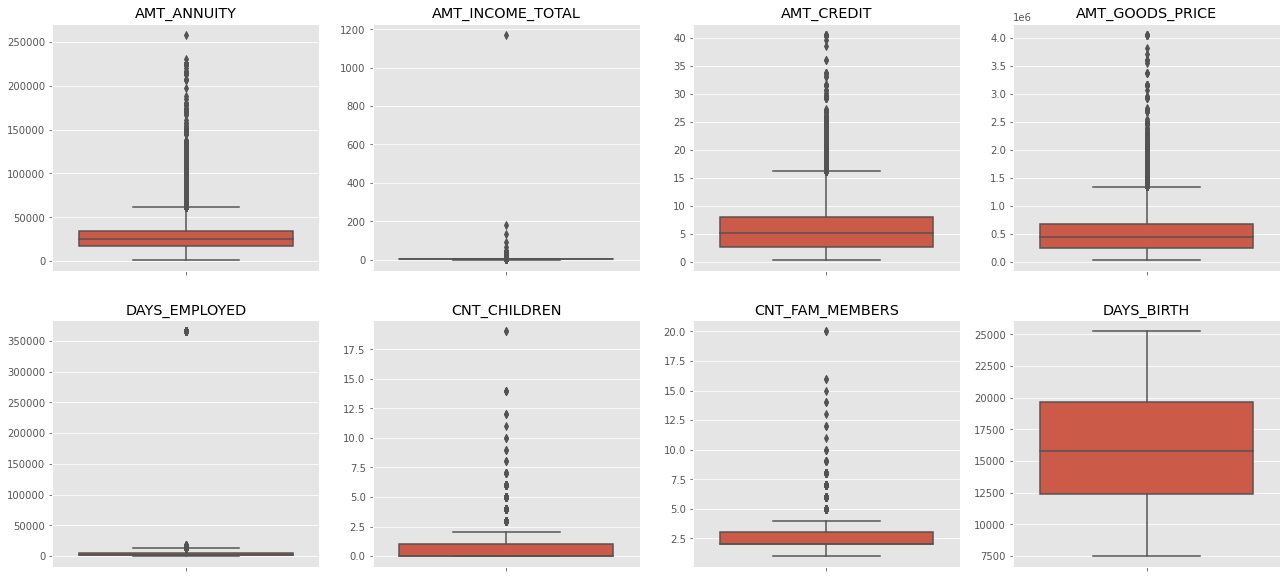

In [66]:
# Boxplot of relevant columns for identifying outliers
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','CNT_FAM_MEMBERS','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=application_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=application_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

##### INSIGHTS:

   -  __AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, CNT_CHILDREN, CNT_FAM_MEMBERS have some outliers.__
   
   -  __AMT_INCOME_TOTAL has a large number of outliers which indicates that few of the loan applicants have higher income as compared to others.__
   
   -  __DAYS_BIRTH has no outliers which means the available data is reliable.__
   
   -  __DAYS_EMPLOYED has extreme outlier values at around 350000 days (i.e. about 958 years), which is not possible and hence such values have to be considered as incorrect entry.__

In [67]:
#Summary statistics for above columns
application_df[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN','CNT_FAM_MEMBERS']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_CHILDREN,CNT_FAM_MEMBERS
count,307499.000000,307511.000000,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307509.000000
mean,27108.573909,1.687979,5.990260,5.383962e+05,16036.995067,67724.742149,0.417052,2.152665
std,14493.737315,2.371231,4.024908,3.694465e+05,4363.988632,139443.751806,0.722121,0.910682
min,1615.500000,0.256500,0.450000,4.050000e+04,7489.000000,0.000000,0.000000,1.000000
25%,16524.000000,1.125000,2.700000,2.385000e+05,12413.000000,933.000000,0.000000,2.000000
50%,24903.000000,1.471500,5.135310,4.500000e+05,15750.000000,2219.000000,0.000000,2.000000
75%,34596.000000,2.025000,8.086500,6.795000e+05,19682.000000,5707.000000,1.000000,3.000000
max,258025.500000,1170.000000,40.500000,4.050000e+06,25229.000000,365243.000000,19.000000,20.000000


### Finding Outliers in Previous Application DataFrame:

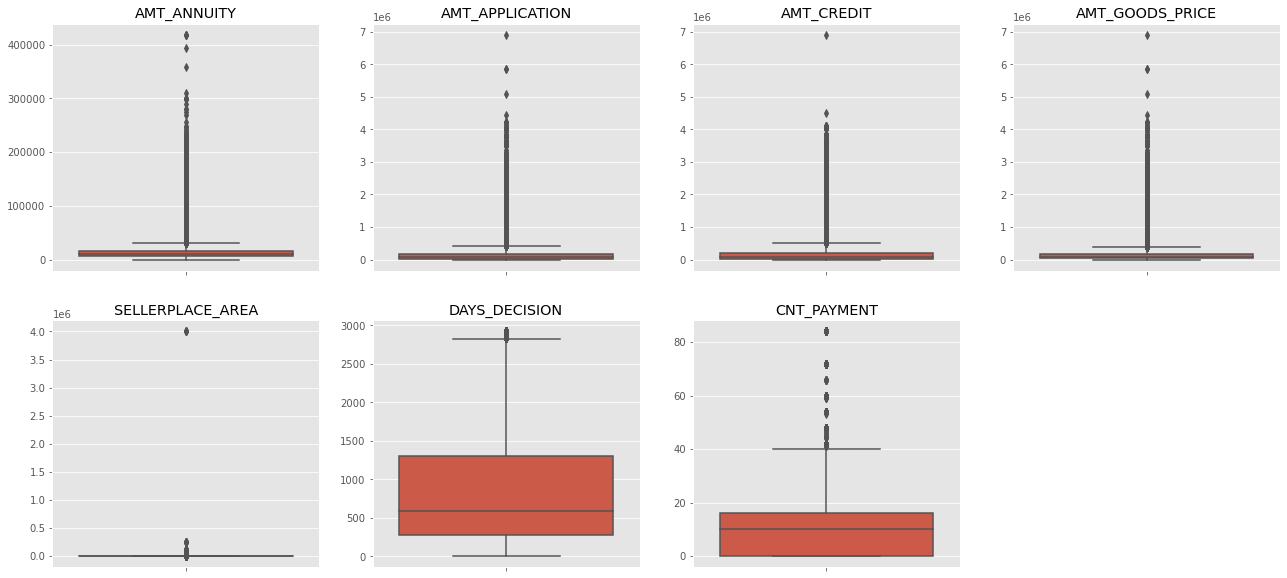

In [68]:
# Boxplot of relevant columns for identifying outliers
plt.figure(figsize=(22,10))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=previous_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=previous_df[i[1]])
    plt.title(i[1])
    plt.ylabel("") 

##### INSIGHTS:

 -  __AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have a large number of outliers.__
 
 -  __CNT_PAYMENT has fewer outlier values__
 
 -  __DAYS_DECISION has very few outliers indicating that decisions for these previous applications were taken long back.__

In [69]:
#Summary statistics for above columns
previous_df[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,3.139511e+02,1.247621e+01,8.806797e+02
std,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.127443e+03,1.447588e+01,7.790997e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
25%,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,-1.000000e+00,0.000000e+00,2.800000e+02
50%,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,3.000000e+00,1.000000e+01,5.810000e+02
75%,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,8.200000e+01,1.600000e+01,1.300000e+03
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,4.000000e+06,8.400000e+01,2.922000e+03


## 3. Data Analysis

### 3.1. Imbalance Data

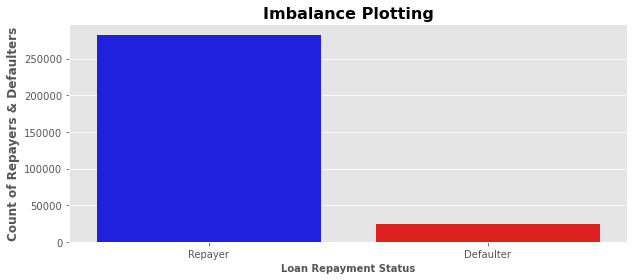

In [70]:
#Plotting count of Target variable
Imbalance = application_df["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sns.barplot(x,"TARGET",data = Imbalance,palette= ['b','r'])
plt.xlabel("Loan Repayment Status",fontdict={'fontsize':10,'weight':'bold'})
plt.ylabel("Count of Repayers & Defaulters", fontdict={'fontsize':12,'weight':'bold'})
plt.title("Imbalance Plotting", fontdict={'fontsize':16,'weight':'bold','horizontalalignment':'center'})
plt.show()

In [71]:
# % count of the Target variable
application_df['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

__Ratio of imbalance in percentage with respect to Repayer and Defaulter data is  91.93 : 8.07.__

### 3.2. Univariate Analysis

In [72]:
# function for plotting repetitive countplots in univariate categorical analysis on applicationDF
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = application_df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    s = sns.countplot(ax=ax1, 
                      x = feature, 
                      data=application_df,
                      hue ="TARGET",
                      order=cat_perc[feature],
                      palette=['b','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'black'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 5, 'color' : 'Black'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set1')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Black'}) 

    plt.show();

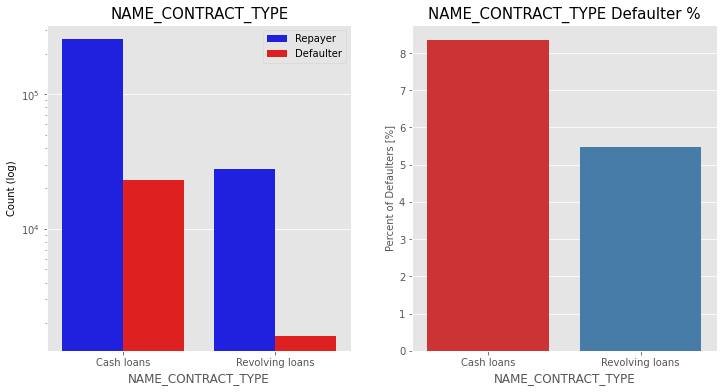

In [73]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

##### INSIGHTS:
__The Contract type - 'Revolving loans' are just a small fraction (10%) of the total number of loans. Also, a larger amount of Revolving loans when compared to their frequency, are not being repaid.__

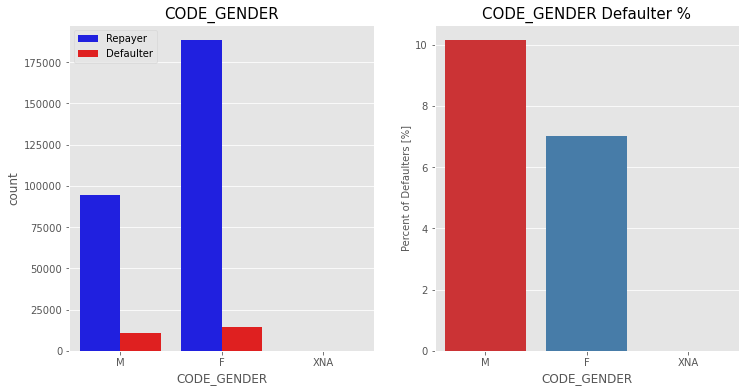

In [74]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

##### INSIGHTS:
__The number of female clients is almost double the number of male clients. Based on the percentage of defaulted credits, males have a higher chance of not returning their loans (approx. 10%), as compared to females (approx. 7%).__

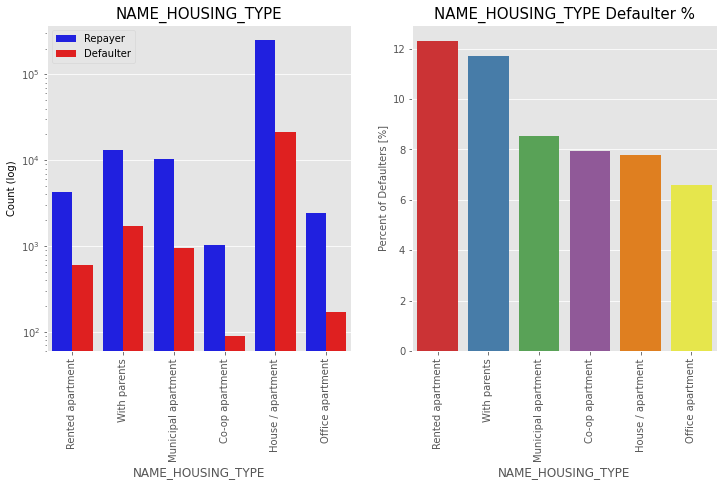

In [75]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

##### INSIGHTS:
-  __Most of the clients live in House/Apartment.__

-  __Clients living in Rented Apartments are most likely to be Defaulters (more than 12%).__

-  __Clients living With parents also have a higher % (almost 12%) to be Defaulters.__

-  __Clients living in the Office apartment are least likely to be Defaulters.__

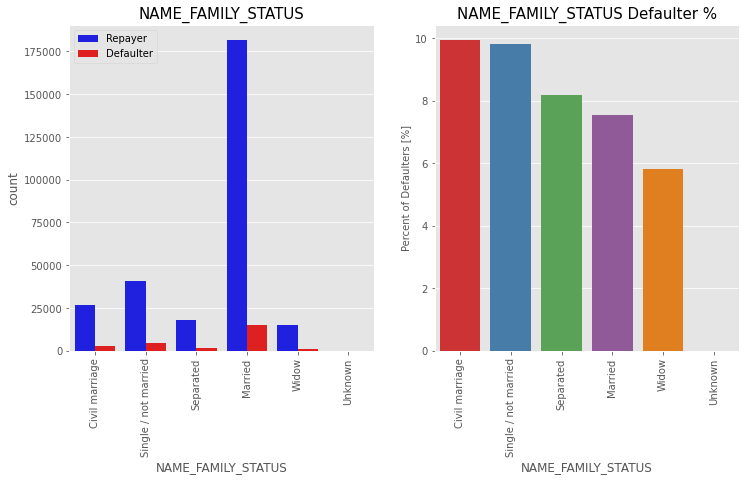

In [76]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

##### INSIGHTS:
-  __Most of the clients are Married.__

-  __Clients with Civil marriage are having high Defaulter% (10%) followed by Single/not married (almost 10%).__

-  __Widow clients are the least Defaulters.__

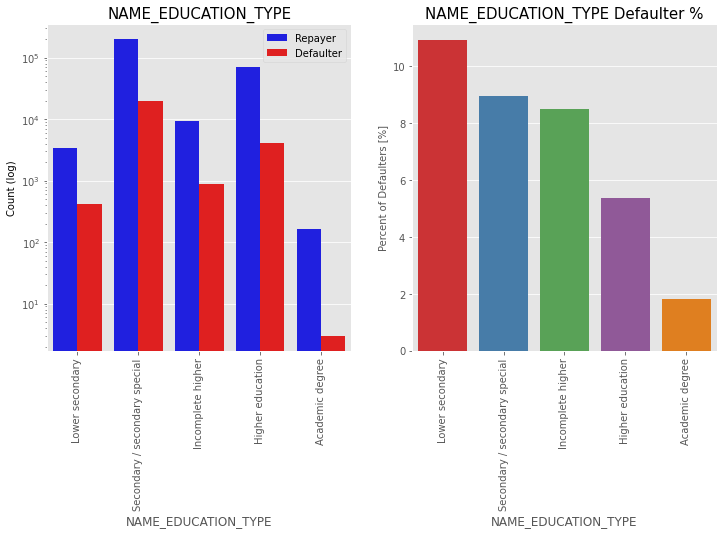

In [77]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

##### INSIGHTS:
-  __Most of the clients are having Secondary/secondary special education.__

-  __Clients with lower secondary (even though they are of very low numbers) have high Defaulter% (>10%) followed by those with Secondary/secondary special education (about 9%).__

-  __Academic degree clients are the least Defaulters.__

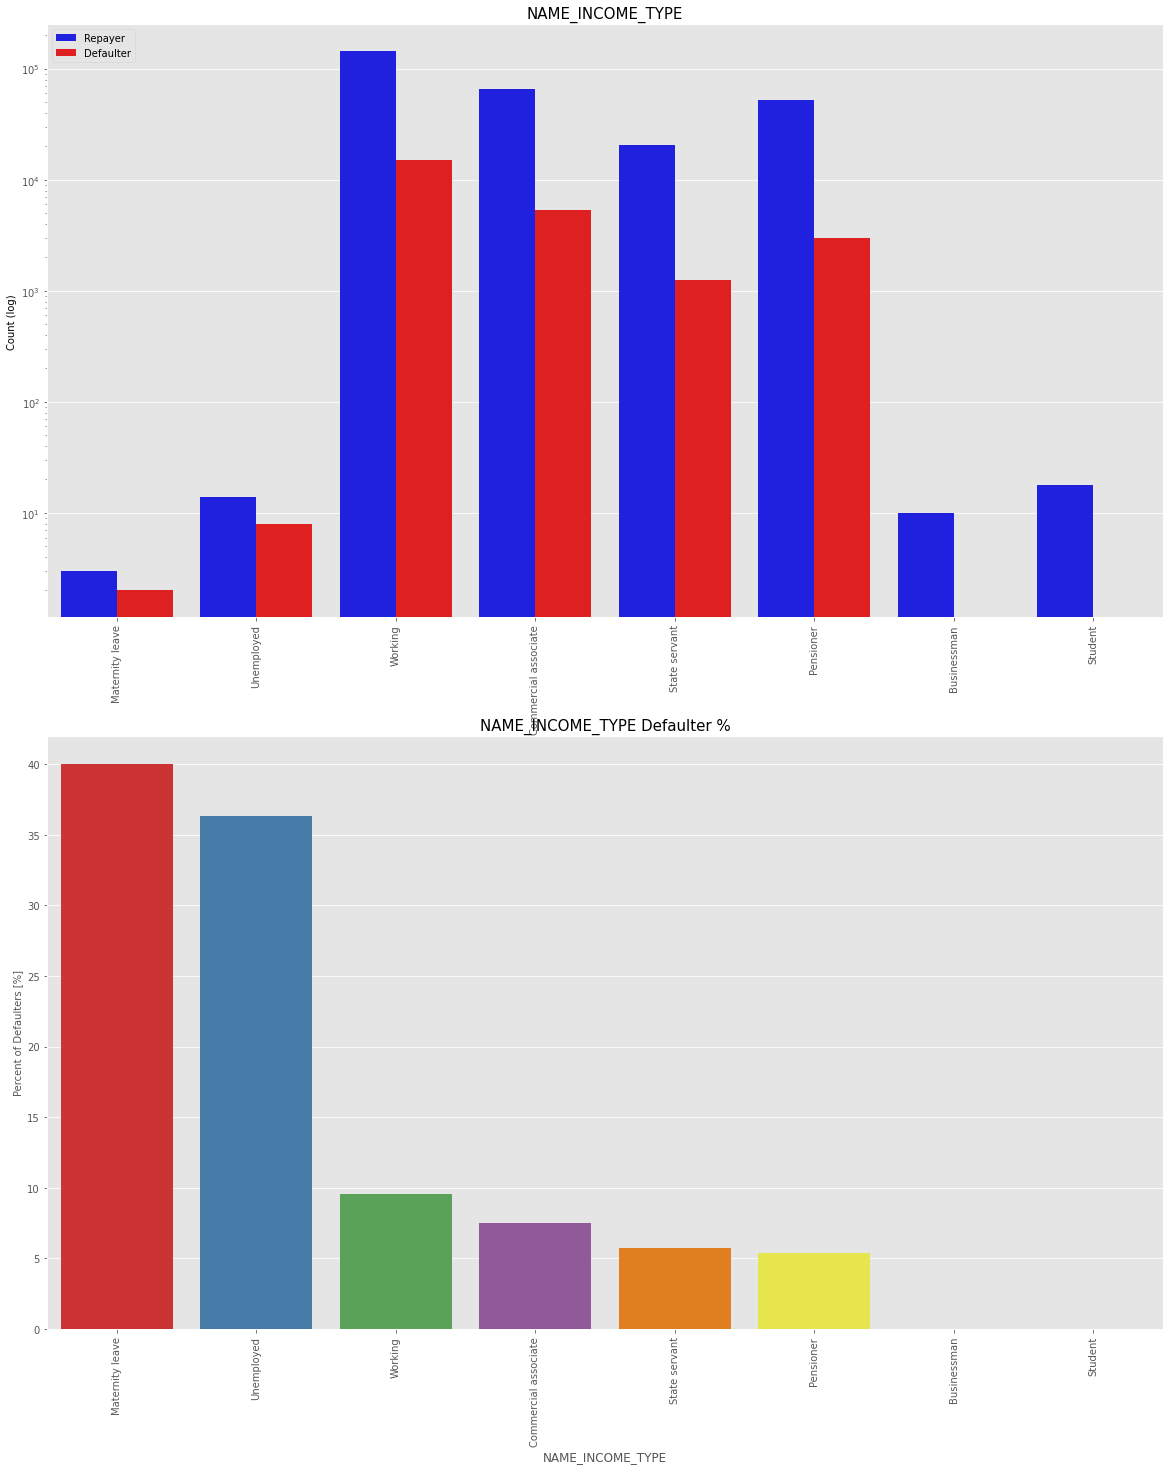

In [78]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

##### INSIGHTS:    
-  __Most of the clients are having INCOME Category as Working, Commercial associate, Pensioner and State servant.__

-  __Clients on Maternity leave (even though they are of very low numbers) have high Defaulter% (almost 40%) followed by those who are Unemployed (>35%).__

-  __Pensioner clients are the least Defaulters.__

-  __Students and Businessmen, though less in numbers do not have any Default record. Thus these two categories are safest for providing loan.__

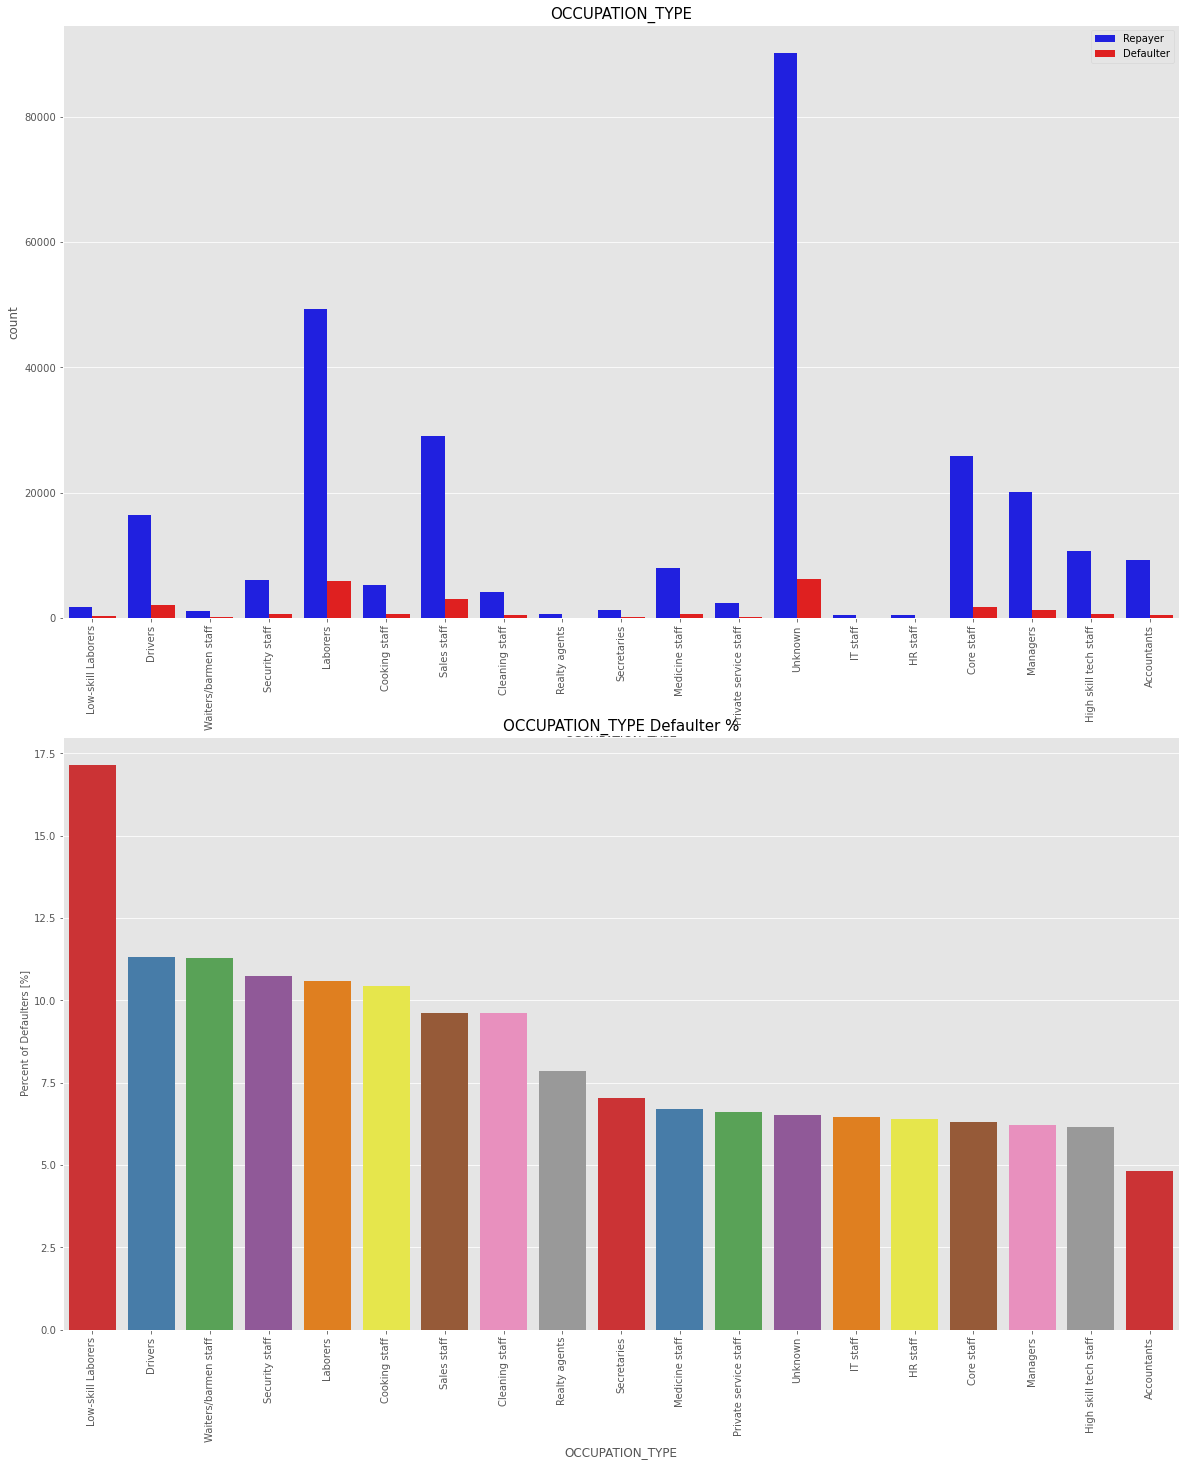

In [79]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

##### INSIGHTS:
-  __Most Of the Clients haven't mentioned their Occupation Type.__

-  __Low Skill Laborers are the highest Defaulters (even though they are rare clients) with >17% followed by Drivers and Waiters/barmen, then by Security staff, Laborers, each with >10%.__

-  __Accountants are the least Defaulter Clients with <5%.__

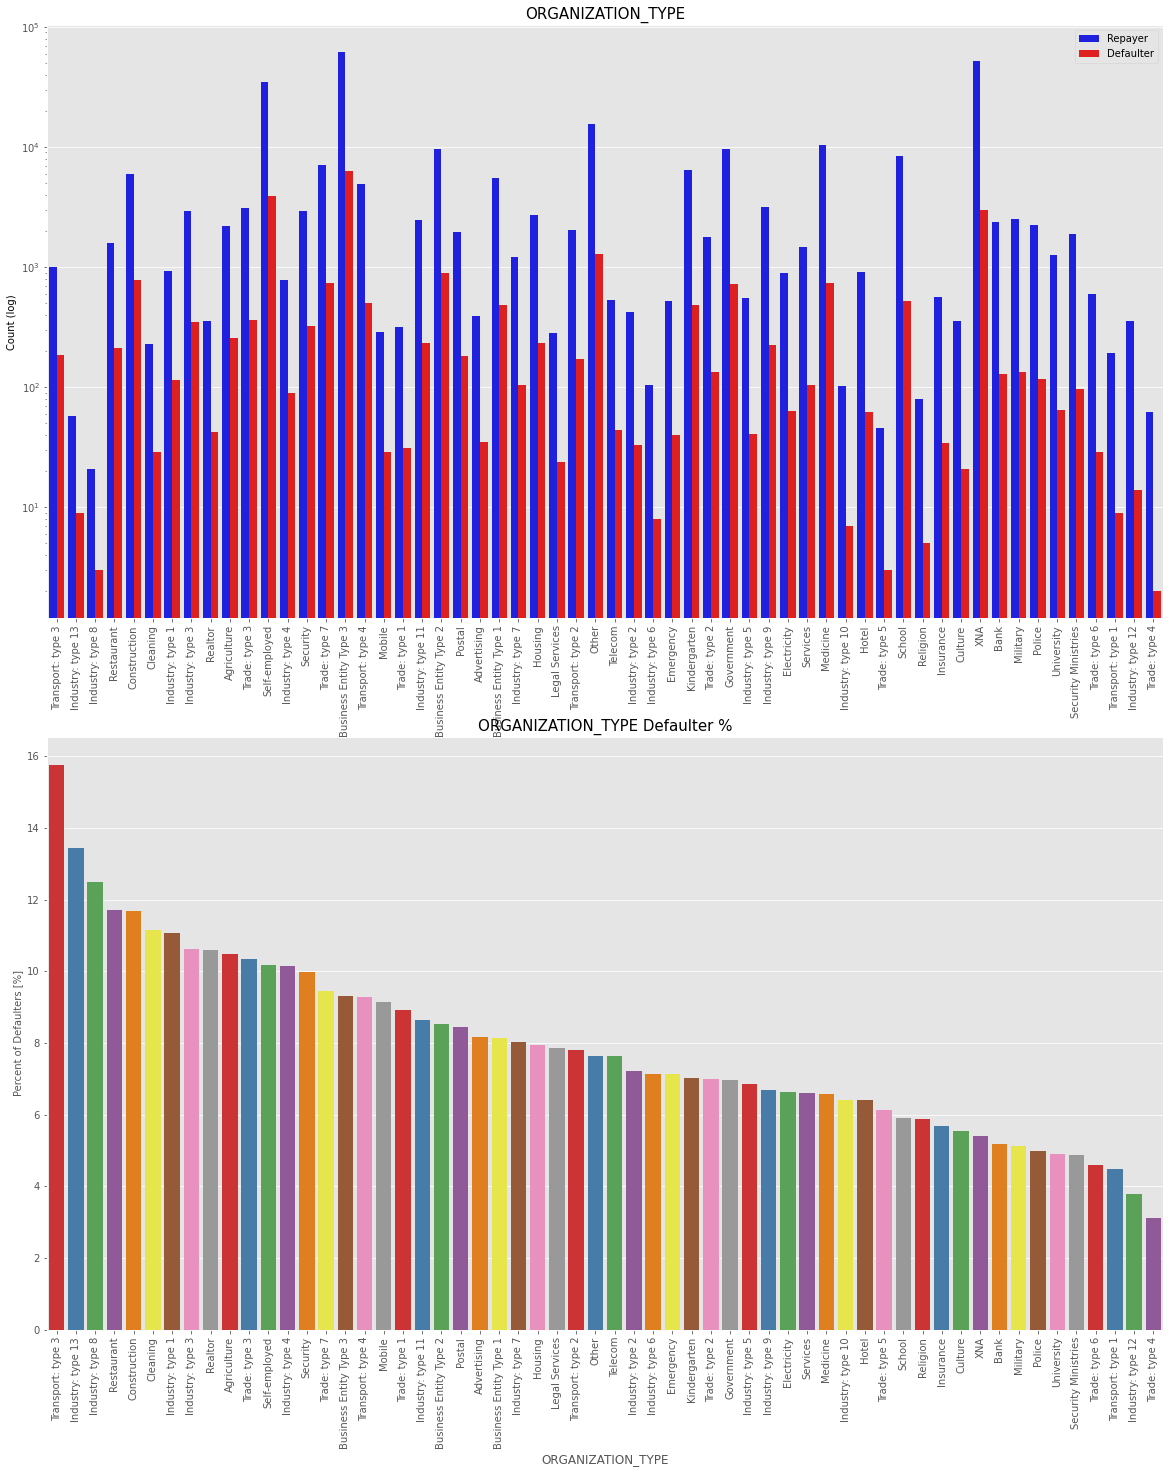

In [80]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

##### INSIGHTS:
-  __Organizations with highest percent of loans not repaid are Transport: type 3 (almost 16%), Industry: type 13 (about 13.5%), Industry: type 8 (about 12.5%), Restaurant and Construction (almost 12% each). Self employed people have relative high Default%, and thus should be avoided while approving for loan.__

-  __Most of the clients are from Business Entity Type 3.__

-  __Organization type information is unavailable for a large number of clients.__

-  __Trade: type 4 and Industry: type 12 are the least Defaulters.__

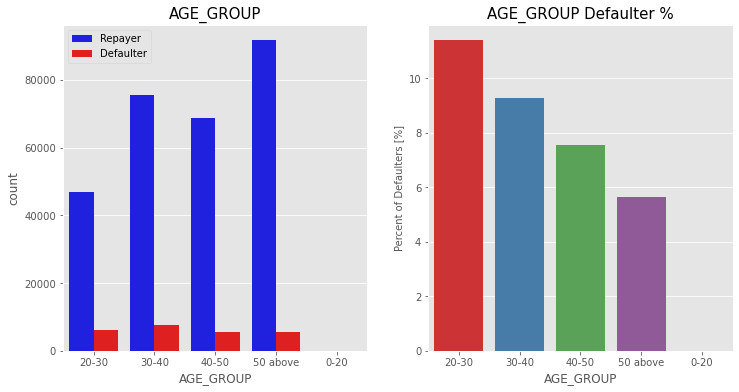

In [81]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

##### INSIGHTS:
-  __Most of the clients are above 50 years of age and also they are the Least Defaulters, so its safe to provide loans to them.__

-  __Clients in age group 20-30 are high Defaulters (>10%).__

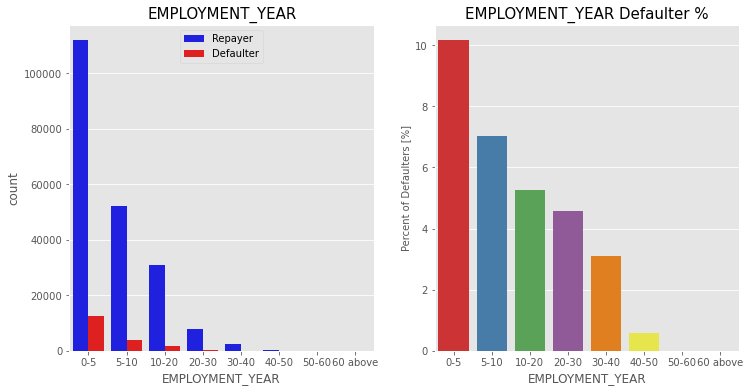

In [82]:
# Analyzing Employment_Year based on loan repayment status
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

##### INSIGHTS:
-  __Most of the clients have been employed for 0-5 years.__

-  __With the increase in years of employment, defaulting % decreases. Thus people with longer years of employment are preferred for providing loans.__

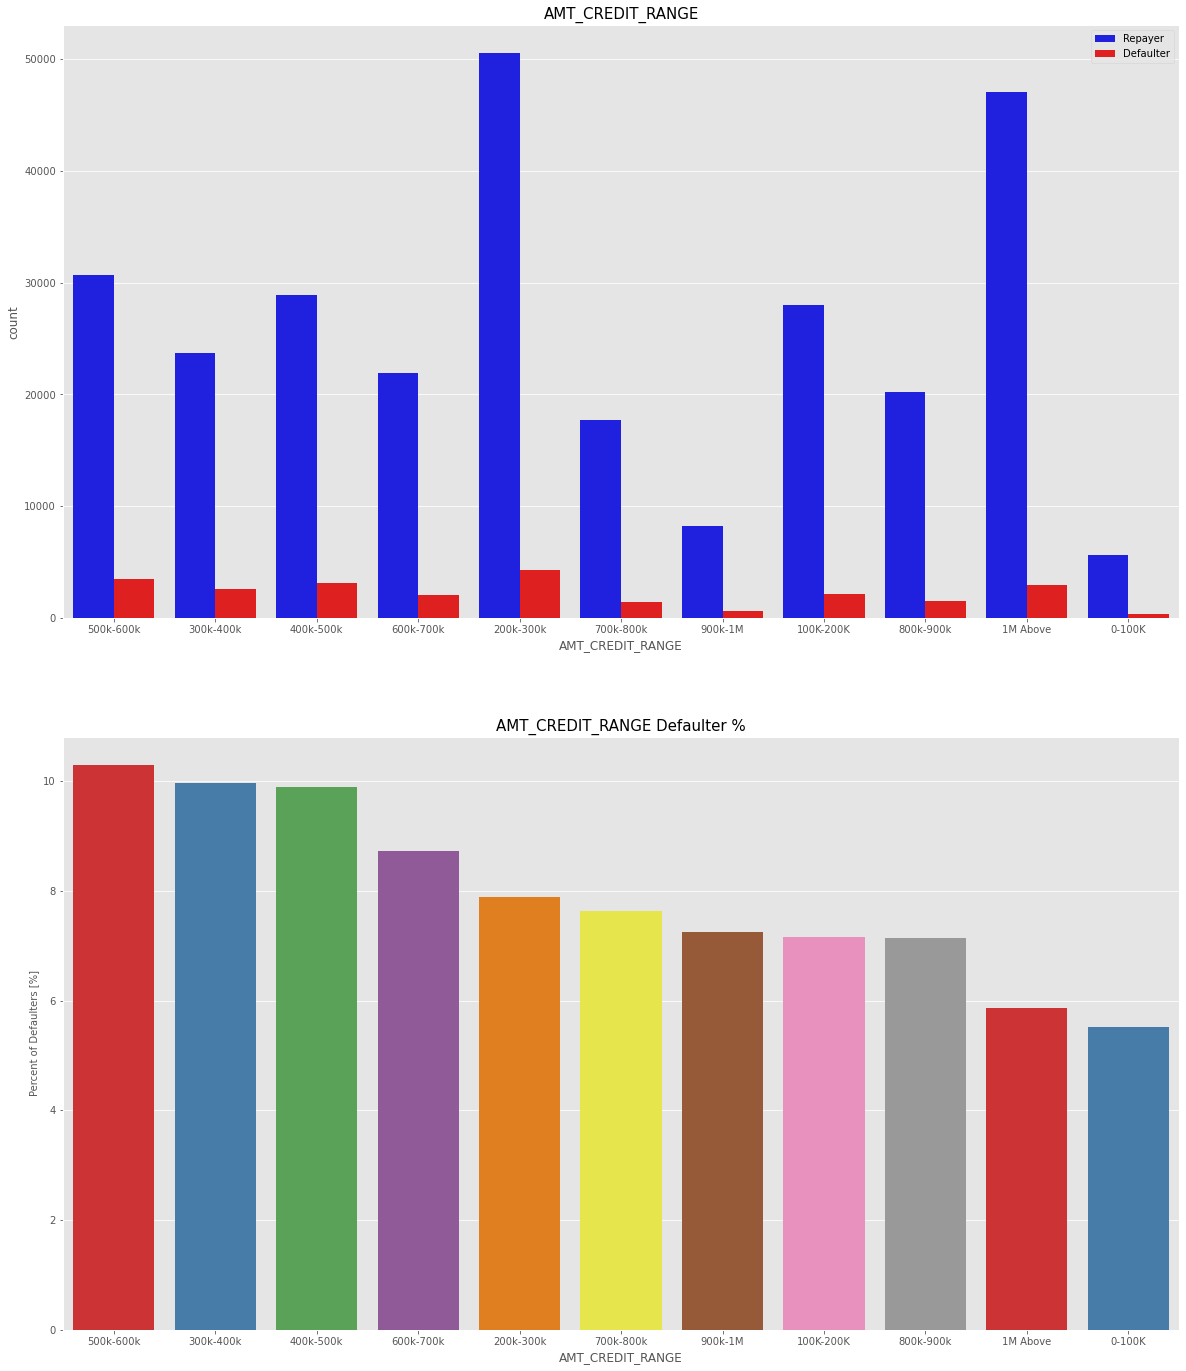

In [83]:
# Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

##### INSIGHTS:
-  __More than 80% of the loans provided are for amount less than 900k.__

-  __Clients who get loans for 300-600k tend to default more than others.__

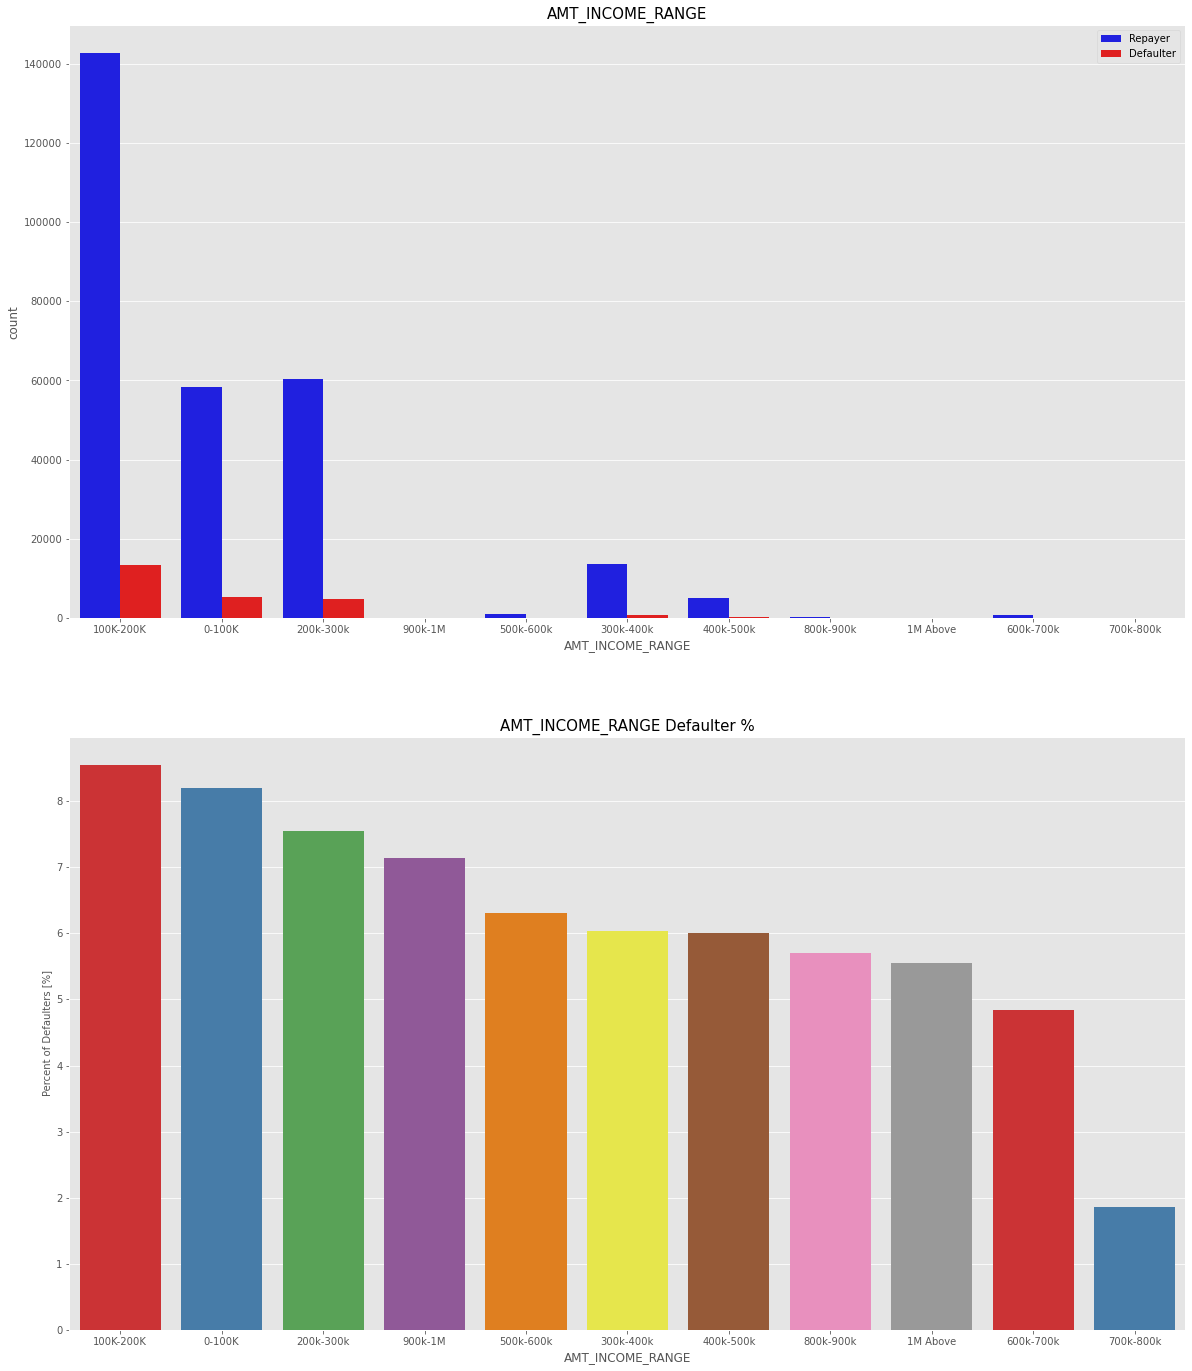

In [84]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

##### INSIGHTS:
-  __90% of the clients have total Income less than 300k.__

-  __Clients with Income less than 300k has higher Defaulting rates.__

-  __Clients  with Income more than 700k are less likely to Default.__

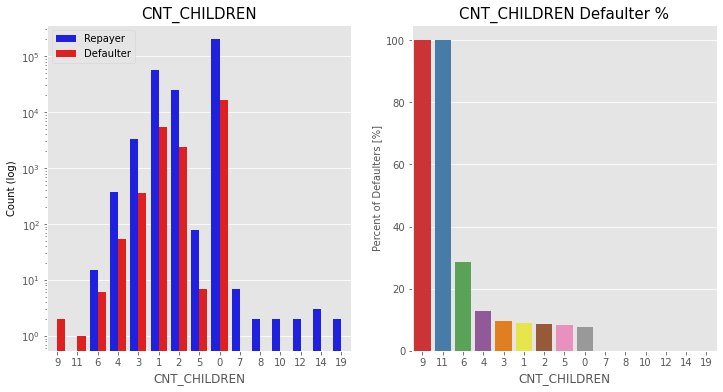

In [85]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

##### INSIGHTS:
-  __Most of the Clients do not have children.__

-  __Client who have more than 4 children has a very high Default rate. 100% Default rate is being observed for clients with 9 or 11 children (though they are rare applicants). Thus not approving loans for such cases is more appropriate.__

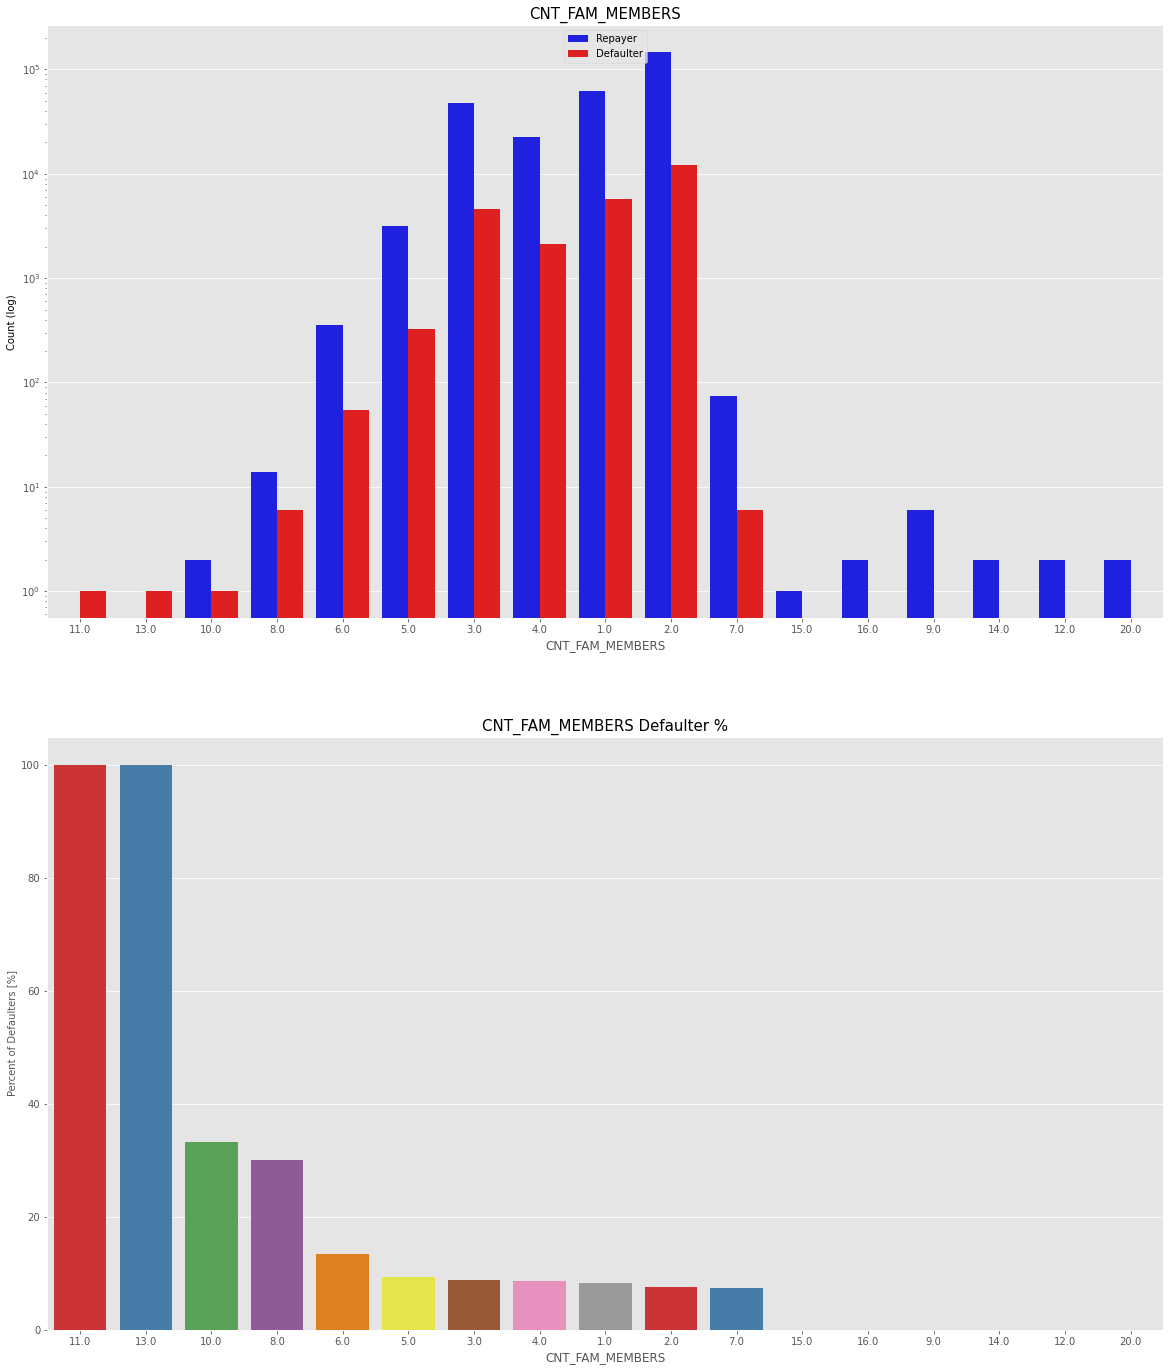

In [86]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

##### INSIGHTS:
-  __Family member count follows the same trend as children count where having more family members increases the risk of Defaulting.__

-  __Clients with 11 or 13 family members have 100% Default rate. Thus not approving loans for clients with more than 10 members is more appropriate.__

### 3.3. Bivariate Analysis

### Numerical Value Analysis for Application DataFrame:

In [87]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT',
                        'DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                        'CNT_CHILDREN','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
                        'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
                        'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION']


Repayer_df = application_df.loc[application_df['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = application_df.loc[application_df['TARGET']==1, cols_for_correlation] # Defaulters

In [88]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
print('Top 10 correlation for Repayers:')
corr_df_repayer.head(10)

Top 10 correlation for Repayers:


,VAR1,VAR2,Correlation
36,AMT_CREDIT,AMT_GOODS_PRICE,0.987250
116,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
24,AMT_ANNUITY,AMT_GOODS_PRICE,0.776686
38,AMT_CREDIT,AMT_ANNUITY,0.771309
64,DAYS_BIRTH,DAYS_EMPLOYED,0.626114
25,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
12,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.349462
37,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
101,CNT_CHILDREN,DAYS_BIRTH,0.336966
77,DAYS_REGISTRATION,DAYS_BIRTH,0.333151


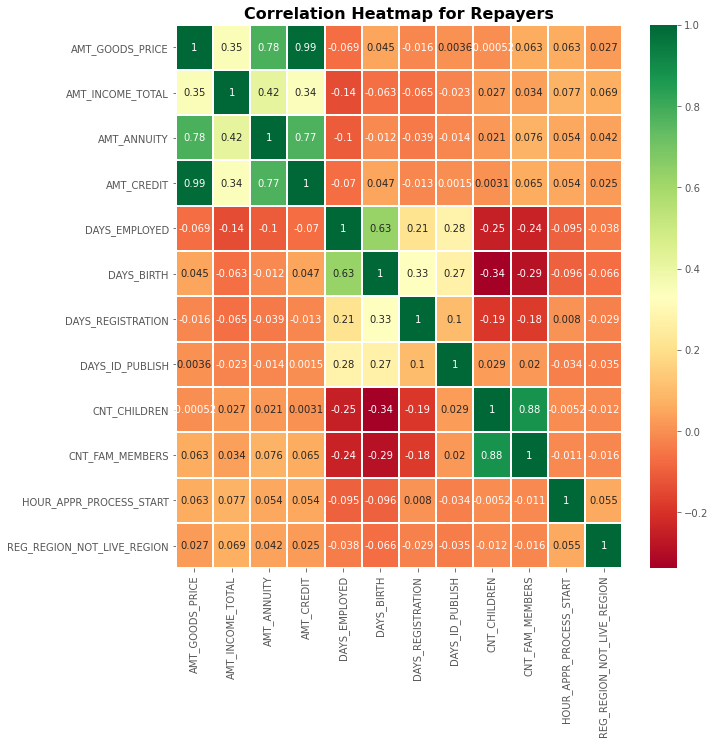

In [89]:
# Checking correlation of numerical columns for Repayers
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)
plt.title("Correlation Heatmap for Repayers",
          fontdict={'fontsize':16,'weight':'bold','horizontalalignment':'center'})
plt.show()

##### INSIGHTS:
__Correlating factors amongst Repayers:__
    
   -  __Credit amount is highly correlated with__
   
        -  __amount of goods price__
        -  __loan annuity__
        -  __total income__


-  __We can also see that Repayers have high correlation in number of days employed.__

In [90]:
# Getting the top 10 correlation for the Defaulter data

corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
print('Top 10 correlation for Defaulters:')
corr_df_Defaulter.head(10)

Top 10 correlation for Defaulters:


,VAR1,VAR2,Correlation
36,AMT_CREDIT,AMT_GOODS_PRICE,0.983103
116,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
24,AMT_ANNUITY,AMT_GOODS_PRICE,0.752699
38,AMT_CREDIT,AMT_ANNUITY,0.752195
64,DAYS_BIRTH,DAYS_EMPLOYED,0.582185
77,DAYS_REGISTRATION,DAYS_BIRTH,0.289114
101,CNT_CHILDREN,DAYS_BIRTH,0.259109
89,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863
88,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090
113,CNT_FAM_MEMBERS,DAYS_BIRTH,0.203267


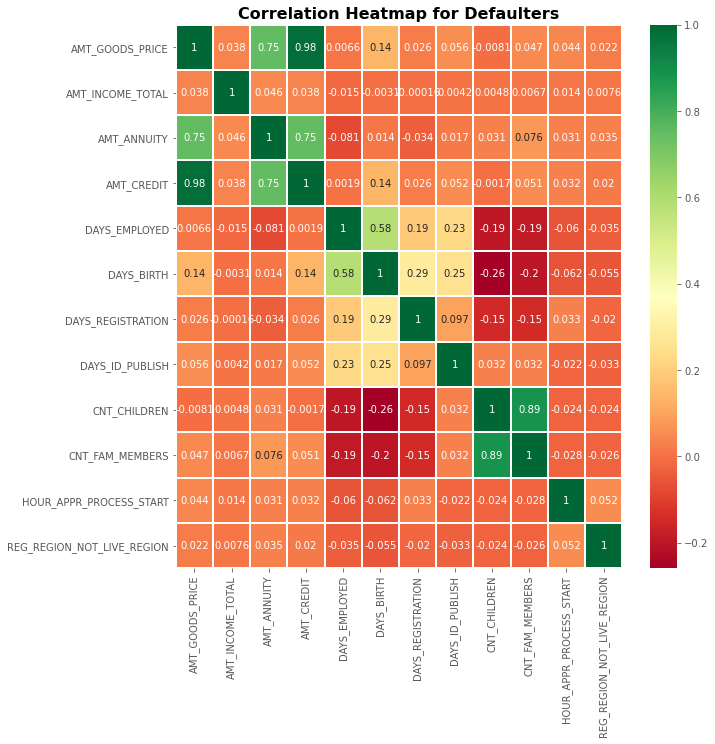

In [91]:
# Checking correlation of numerical columns for Defaulters
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)
plt.title("Correlation Heatmap for Defaulters",
          fontdict={'fontsize':16,'weight':'bold','horizontalalignment':'center'})
plt.show()

##### INSIGHTS:

-  __Credit amount is highly correlated with amount of goods price which is similar as for Repayers.__

-  __The loan annuity correlation with credit amount has slightly reduced for Defaulters (0.75) when compared to Repayers (0.77).__

-  __Also, the correlation for Employment days is reduced in case of Defaulters (0.58) as compared to that of Repayers (0.63).__

<Figure size 576x576 with 0 Axes>

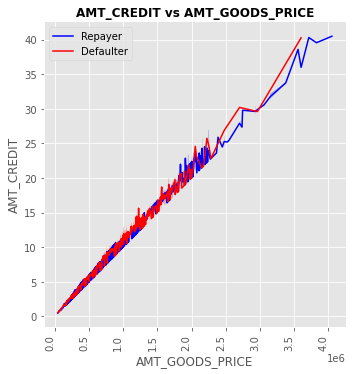

In [92]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
plt.figure(figsize=(8,8))
sns.relplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT', 
                data=application_df, 
                hue="TARGET",
                kind="line",
                palette = ['b','r'],
                legend = False);
plt.xticks(rotation=90, ha='right')
plt.legend(['Repayer','Defaulter'])
plt.title('AMT_CREDIT vs AMT_GOODS_PRICE',
          fontdict={'fontsize':12,'weight':'bold','horizontalalignment':'center'})
plt.show()

##### INSIGHTS:
-  __When the credit amount exceeds 3M for amount goods price, there is an increase in Defaulters.__

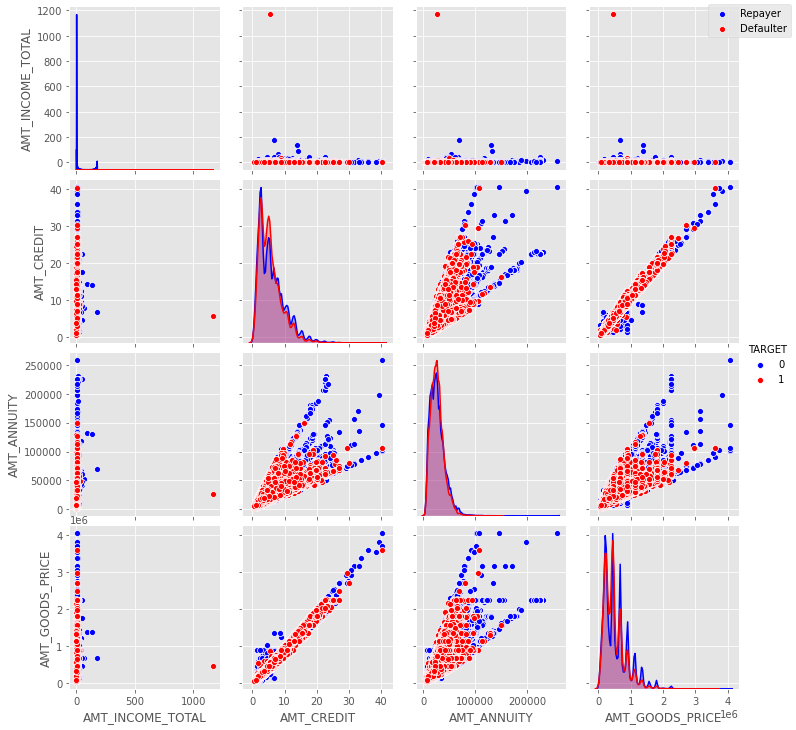

In [93]:
# Pairplot between amount variables to draw inferences against loan repayment status
amount = application_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

##### INSIGHTS:
-  __AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on their corresponding scatterplot.__

### 3.4. Merged Dataframe Analysis

In [94]:
#Merging both the dataframes (application_df & previous_df) on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(application_df,previous_df,how='inner', on='SK_ID_CURR')
loan_process_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,200k-300k,400k-500k,25,20-30,1,0-5,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,400-800
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,400-800
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,800-1200
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,2000-2400
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-100K,100K-200K,52,50 above,0,NaN,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,800-1200


In [95]:
#Checking dimensions of the merged dataframe
loan_process_df.shape

(1413701, 74)

In [96]:
#Checking the columns and column types of the mergerd dataframe
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [97]:
# Checking numerical columns statistics of the merged dataframe 
loan_process_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413700e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+00,5.875537e+00,2.701702e+04,5.277186e+05,2.074985e-02,1.632105e+04,7.266347e+04,5.003233e+03,3.034563e+03,2.150501e+00,1.198433e+01,1.207327e-02,1.544176e+00,1.540436e-01,1.526303e+00,1.080426e-01,-1.084701e+03,7.385600e-01,5.484894e-03,6.028149e-03,3.410198e-02,2.664913e-01,3.196935e-01,2.691239e+00,4.421384e+01,1.985500e+02,1.922744e+06,1.484032e+04,1.752436e+05,1.963541e+05,1.854396e+05,8.803670e+02,3.149878e+02,1.256367e+01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+00,3.849173e+00,1.395116e+04,3.532465e+05,1.334702e-02,4.344557e+03,1.433374e+05,3.551051e+03,1.507376e+03,9.006787e-01,3.232181e+00,1.092132e-01,2.530715e+00,4.658973e-01,2.508953e+00,3.790588e-01,7.999369e+02,4.394192e-01,7.702591e-02,1.001966e-01,2.012902e-01,9.268428e-01,8.781444e-01,2.157176e+00,1.190217e+01,3.926378e+02,5.327153e+05,1.316370e+04,2.936222e+05,3.194813e+05,2.881244e+05,7.835402e+02,7.695082e+03,1.448807e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e-01,4.500000e-01,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.292000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+00,2.700000e+00,1.682100e+04,2.385000e+05,1.003200e-02,1.273900e+04,1.042000e+03,2.001000e+03,1.783000e+03,2.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.683000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.400000e+01,2.000000e+00,1.461346e+06,7.406055e+03,1.975050e+04,2.488050e+04,4.500000e+04,2.710000e+02,-1.000000e+00,0.000000e+00
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+00,5.084955e+00,2.492550e+04,4.500000e+05,1.885000e-02,1.604400e+04,2.401000e+03,4.508000e+03,3.330000e+03,2.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.011000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.300000e+01,6.000000e+00,1.922698e+06,1.125000e+04,7.087050e+04,8.059500e+04,7.087500e+04,5.820000e+02,4.000000e+00,1.000000e+01
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+00,8.079840e+00,3.454200e+04,6.795000e+05,2.866300e-02,1.998000e+04,6.313000e+03,7.510000e+03,4.319000e+03,3.000000e+00,1.400000e+01,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,-3.960000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,5.400000e+01,1.700000e+01,2.384012e+06,1.67479

In [98]:
# Bifurcating the merged dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

In [99]:
# function for plotting repetitive countplots for analysis on the merged dataframe

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

For Repayers: 


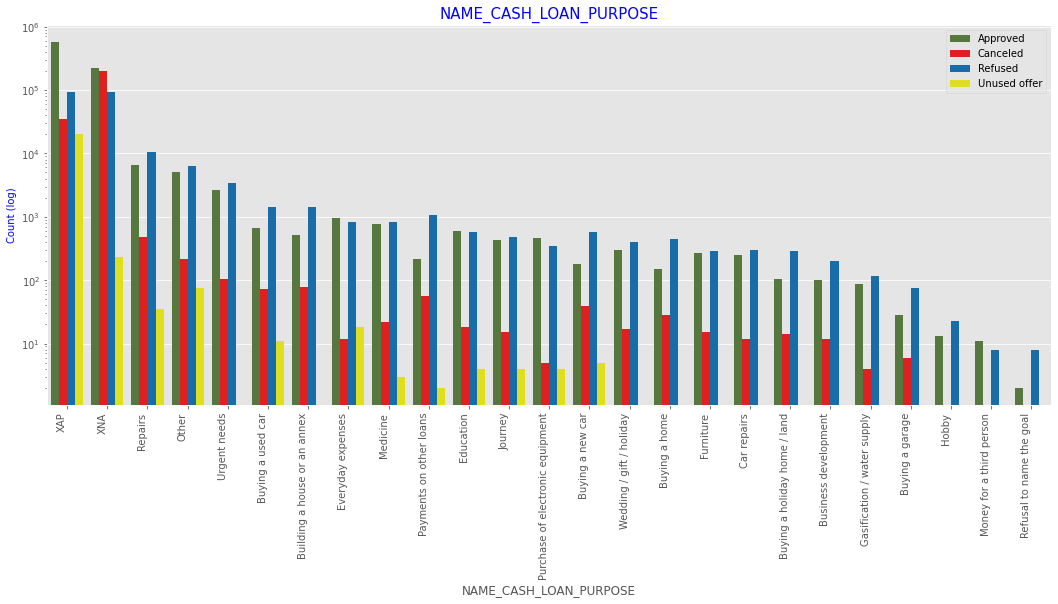

In [100]:
#Status For Repayers
print('For Repayers: ')
univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

For Defaulters: 


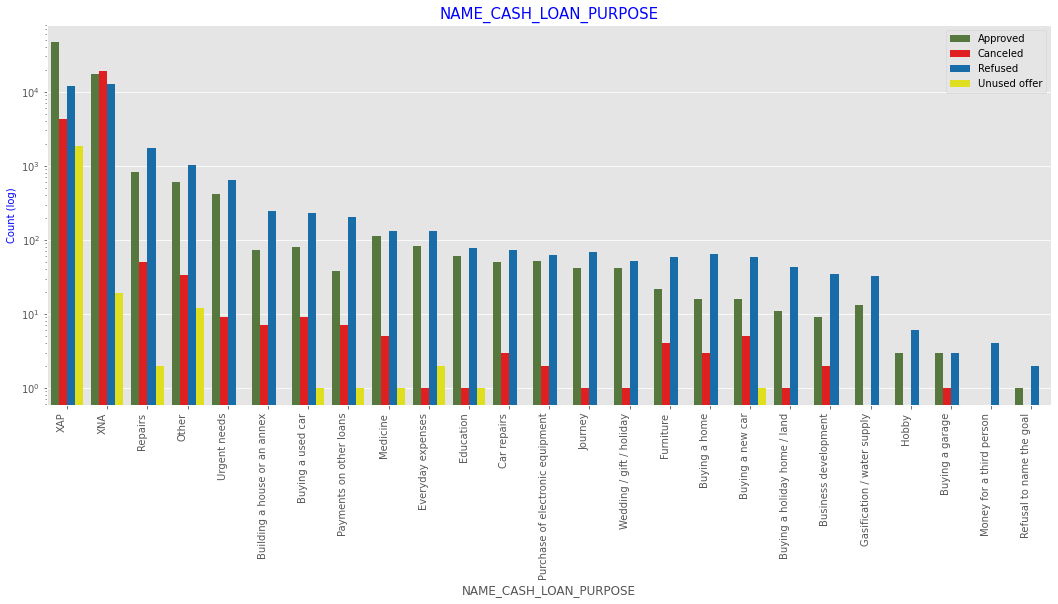

In [101]:
#Status For Defaulters
print('For Defaulters: ')
univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

##### INSIGHTS:
-  __Loan purpose has high number of unknown values (XAP, XNA).__

-  __Loans taken for the purpose of Repairs seems to have highest Default rate.__

-  __A very high number of applications for the purpose of 'Repairs' and 'Others' has been Refused by Company or Canceled by Client. This indicates that the purpose Repairs is considered to be of high risk by the Company. Thus the Company either Refused such loan applications or offered it at very high loan interest rate which is not feasible for the Client, so they Canceled their application.__

In [102]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss

g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


##### INSIGHTS:
-  __About 90% of the loans have been repayed for cases where the Client Canceled their application. Revising the interest rates would increase business opportunity for these Clients.__

-  __88% of the Clients who have been previously Refused a loan by the Company, have repayed back the loan in current case. Thus such cases can be revisited in order to expand the consumer base.__

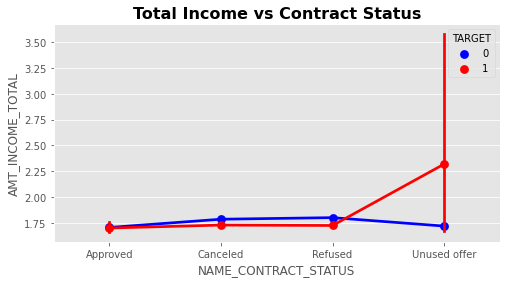

In [103]:
# Plotting the relationship between income total and contract status
plt.figure(figsize=(8,4))
sns.pointplot(x="NAME_CONTRACT_STATUS",y='AMT_INCOME_TOTAL',hue="TARGET",data=loan_process_df,palette =['b','r'])
plt.title('Total Income vs Contract Status',
          fontdict={'fontsize':16,'weight':'bold','horizontalalignment':'center'})
plt.show()

##### INSIGHTS:
__The point plot show that the Clients who have not Used offer earlier have Defaulted even when their average income is higher than others.__

## 4. Conclusion

__The following factors indicate that an applicant will be a Repayer:__

-  __Academic degree clients have less Defaults.__

-  __Students and Businessmen have no Defaults.__

-  __Clients with Trade: type 4 and Industry: type 12 have Defaulting rate of less than 4%.__

-  __Clients above the age of 50 years have low probability of Defaulting.__

-  __Clients with 40+ years of employment have less than 1% Default Rate.__

-  __Clients with Income more than 700,000 are less likely to Default__

-  __Loans applied for Hobby, Buying garage are being repayed in most cases.__

-  __Clients with zero to two children tend to repay the loans.__

__The following factors indicate that an applicant will be a Defaulter:__

-  __Clients who have Civil marriage or those who are Single have higher Default rate.__

-  __Clients with education level of Lower Secondary & Secondary/secondary special have high Default rate.__

-  __Clients who are either on Maternity leave or are Unemployed have high Default rate.__

-  __Low skill Laborers, Drivers and Waiters/barmen, Security staff, Laborers and Cooking staff should be avoided as Clients as their Defaulting rate is high.__

-  __Organizations with highest percent of loans not repaid are Transport: type 3 (almost 16%), Industry: type 13 (about 13.5%), Industry: type 8 (about 12.5%), Restaurant and Construction (almost 12% each). Self employed people have relative high Default%, and thus should be avoided while approving for loan or charged higher interest rate to mitigate the risk of Defaulting.__

-  __Clients in the age group of 20-40 years should be avoided as they have higher probability of Defaulting.__

-  __Clients with less than 5 years of employment have high Default rate.__

-  __Clients with more than 8 children have a Default rate of 100% and hence their applications should not be approved.__

-  __When the Credit amount goes beyond 3 million, there is an increase in Defaulters.__

__Insights From Previous Applications:__

-  __About 90% of the loans have been repayed for cases where the Client Canceled their application previously. Recording the reason for cancelation can help the Company to determine and negotiate terms with these repaying Customers in future for increasing their business opportunity.__

-  __88% of the Clients who have been previously Refused a loan by the Company, have now turned into a repaying Client. Hence documenting the reason for rejection can mitigate the business loss and these clients could be contacted for future loans.__